In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [62]:
df =pd.read_csv("airbnb_listing_train.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [63]:
df.shape

(12901, 16)

In [64]:
df.isna().sum()

id                                    0
name                                 22
host_id                               0
host_name                             8
neighbourhood_group               12901
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        1596
reviews_per_month                  1596
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [65]:
df.drop(["id", "name", "host_id","host_name", "neighbourhood_group", "latitude", "longitude"], axis=1, inplace=True)

In [66]:
df.fillna("0")

,neighbourhood,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,De Pijp - Rivierenbuurt,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,Oud-Oost,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,Centrum-West,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,Westerpark,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,Westerpark,Private room,2,89,26-02-2020,4.02,1,24,90
...,...,...,...,...,...,...,...,...,...
12896,De Baarsjes - Oud-West,Entire home/apt,1,1,13-09-2017,0.03,1,88,65
12897,IJburg - Zeeburgereiland,Entire home/apt,7,238,25-02-2020,2.75,1,357,160
12898,De Pijp - Rivierenbuurt,Entire home/apt,3,15,07-10-2018,0.31,1,0,180
12899,Zuid,Entire home/apt,2,11,28-04-2019,0.37,1,0,136


In [67]:
df.isna().sum()

neighbourhood                        0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       1596
reviews_per_month                 1596
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

In [68]:
df['neighbourhood'].value_counts()

neighbourhood
De Baarsjes - Oud-West                    2209
De Pijp - Rivierenbuurt                   1600
Centrum-West                              1429
Centrum-Oost                              1097
Westerpark                                 958
Zuid                                       924
Oud-Oost                                   831
Bos en Lommer                              730
Oostelijk Havengebied - Indische Buurt     644
Watergraafsmeer                            381
Oud-Noord                                  376
IJburg - Zeeburgereiland                   321
Slotervaart                                269
Noord-West                                 257
Noord-Oost                                 171
Buitenveldert - Zuidas                     155
Geuzenveld - Slotermeer                    144
De Aker - Nieuw Sloten                      88
Osdorp                                      83
Gaasperdam - Driemond                       80
Bijlmer-Centrum                             78

In [69]:
df['room_type'].value_counts()

room_type
Entire home/apt    10064
Private room        2622
Hotel room           174
Shared room           41
Name: count, dtype: int64

In [70]:
df.describe()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,12901.000000,12901.000000,11305.000000,12901.000000,12901.000000,12901.000000
mean,3.542516,24.803194,0.748501,2.136501,61.392295,166.959538
std,15.154077,53.406134,1.260791,6.001838,107.988329,234.794630
min,1.000000,0.000000,0.010000,1.000000,0.000000,6.000000
25%,2.000000,2.000000,0.180000,1.000000,0.000000,99.000000
50%,2.000000,9.000000,0.380000,1.000000,0.000000,135.000000
75%,3.000000,24.000000,0.770000,1.000000,87.000000,190.000000
max,1001.000000,843.000000,50.000000,78.000000,365.000000,9000.000000


In [71]:
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.01)
print(p1, p2)

600.0 40.0


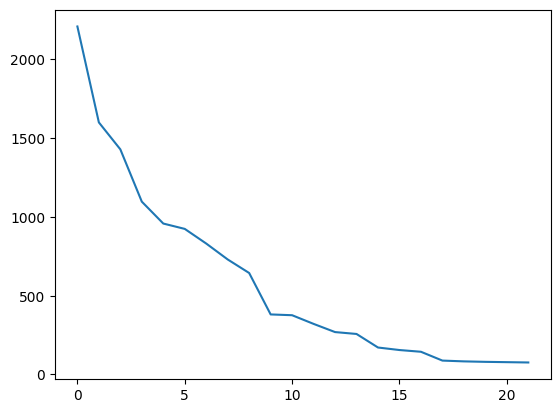

In [72]:
nb = df['neighbourhood'].value_counts()
plt.plot(range(len(nb)), nb)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   12901 non-null  object 
 1   room_type                       12901 non-null  object 
 2   minimum_nights                  12901 non-null  int64  
 3   number_of_reviews               12901 non-null  int64  
 4   last_review                     11305 non-null  object 
 5   reviews_per_month               11305 non-null  float64
 6   calculated_host_listings_count  12901 non-null  int64  
 7   availability_365                12901 non-null  int64  
 8   price                           12901 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 907.2+ KB


In [74]:
df.drop(["last_review", "neighbourhood"], axis=1, inplace = True)
df

,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,Entire home/apt,3,13,0.27,1,0,220
1,Entire home/apt,4,14,0.29,1,0,110
2,Entire home/apt,2,9,1.65,1,7,100
3,Entire home/apt,3,42,0.72,1,0,130
4,Private room,2,89,4.02,1,24,90
...,...,...,...,...,...,...,...
12896,Entire home/apt,1,1,0.03,1,88,65
12897,Entire home/apt,7,238,2.75,1,357,160
12898,Entire home/apt,3,15,0.31,1,0,180
12899,Entire home/apt,2,11,0.37,1,0,136


In [75]:
df = pd.get_dummies(df, sparse=True, drop_first=False, dtype=int)
df

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3,13,0.27,1,0,220,1,0,0,0
1,4,14,0.29,1,0,110,1,0,0,0
2,2,9,1.65,1,7,100,1,0,0,0
3,3,42,0.72,1,0,130,1,0,0,0
4,2,89,4.02,1,24,90,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
12896,1,1,0.03,1,88,65,1,0,0,0
12897,7,238,2.75,1,357,160,1,0,0,0
12898,3,15,0.31,1,0,180,1,0,0,0
12899,2,11,0.37,1,0,136,1,0,0,0


<Axes: >

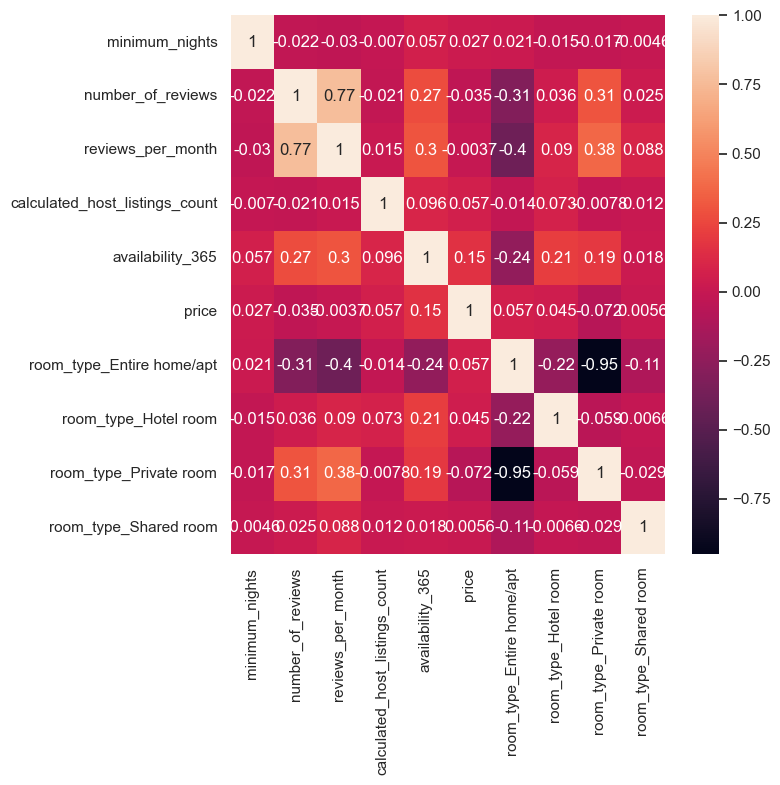

In [86]:
sns.set(rc ={'figure.figsize': (7,7)})
sns.heatmap(data=df.corr(), annot=True)

In [91]:
X = df[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "room_type_Entire home/apt", "room_type_Hotel room", "room_type_Private room", "room_type_Shared room"]]
y= df['price']

In [92]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [105]:
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X = X.fillna('0')
X.isna().sum()

minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
room_type_Entire home/apt         0
room_type_Hotel room              0
room_type_Private room            0
room_type_Shared room             0
dtype: int64

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [109]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly,y_train)

LinearRegression()

In [110]:
y_pred = reg.predict(poly.fit_transform(X_test))

In [122]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(sqrt(metrics.mean_squared_error(y_test, y_pred)))


113.47222565192632
1318.5555134080832
